# Multiple Linear Regression
 Medical Cost - Insurance



We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.


In [101]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [102]:
import numpy as np
import pandas as pd

In [103]:
medical = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning Algo/1. Linear Regression/Multiple Linear Regression/Insurance - Medical Cost Personal Dataset/insurance.csv")

In [104]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520




    age: age of primary beneficiary

    sex: insurance contractor gender, female, male

    bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
    objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

    children: Number of children covered by health insurance / Number of dependents

    smoker: Smoking

    region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

    charges: Individual medical costs billed by health insurance


In [105]:
# Let's do data viz

import matplotlib.pyplot as plt
import seaborn as sns

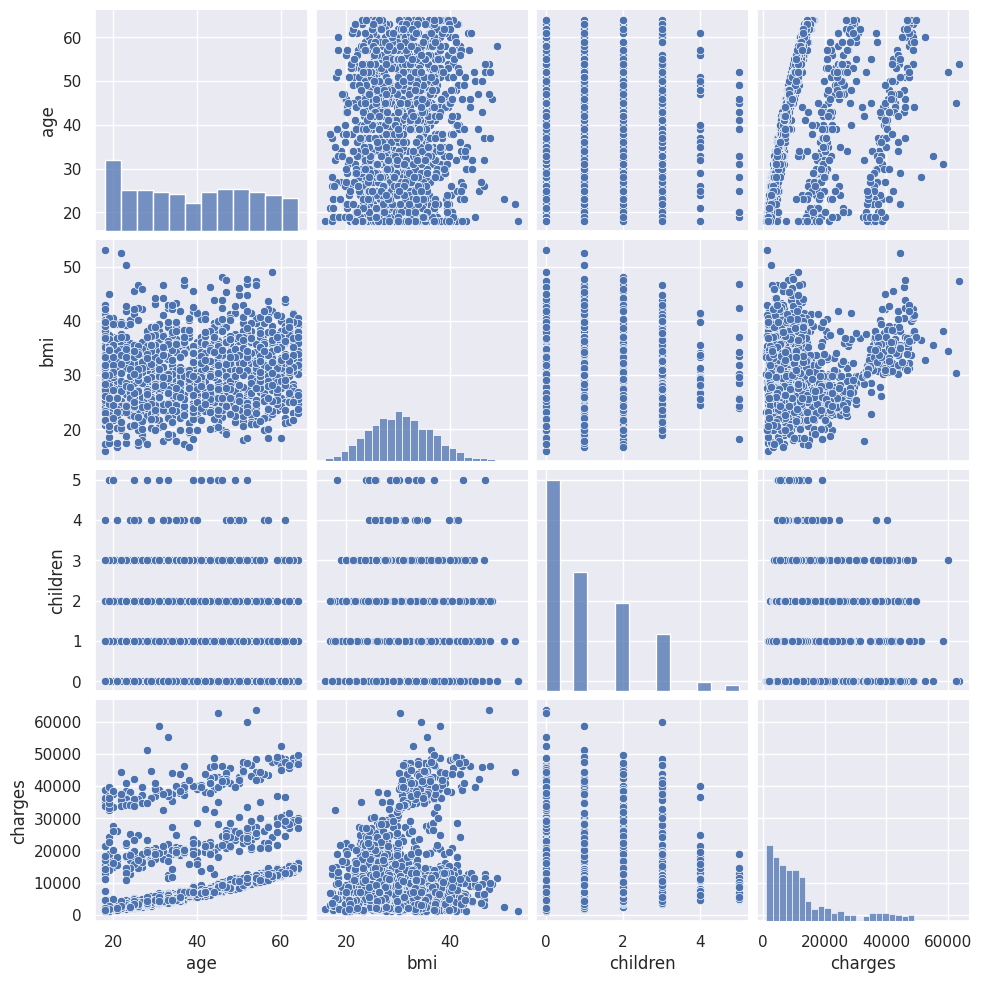

In [106]:
sns.pairplot(medical)
plt.show()

In [107]:
medical.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [108]:

medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


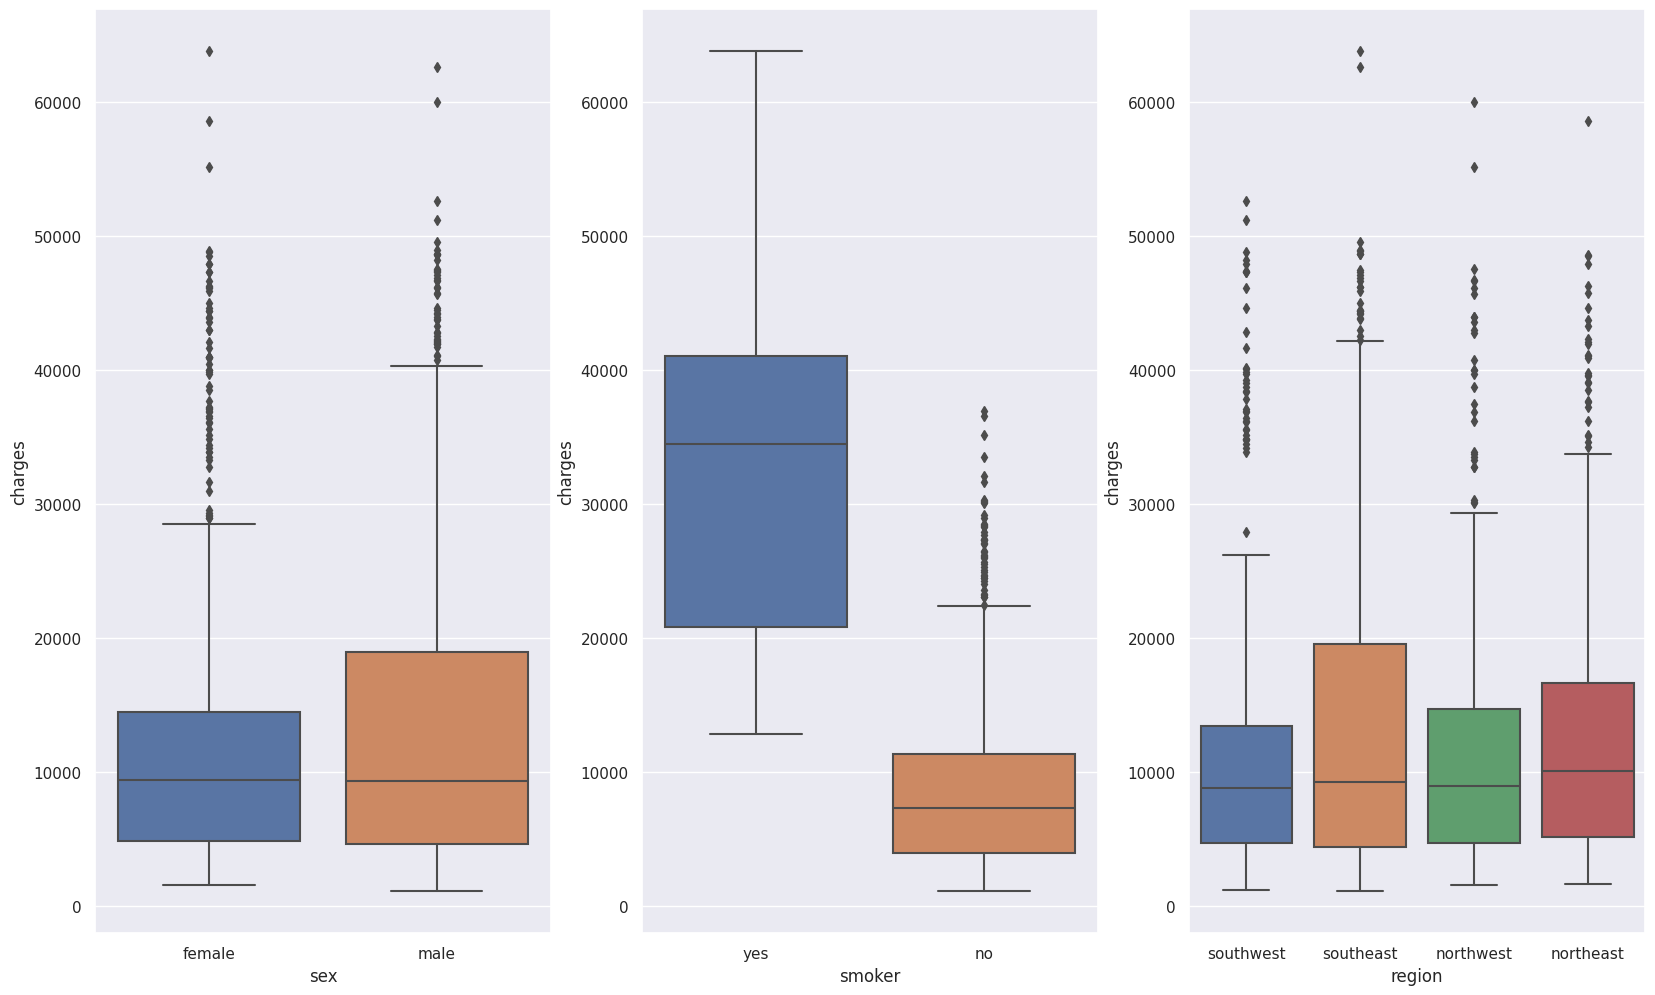

In [109]:
plt.figure(figsize=(20, 12))
plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=medical)
plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=medical)
plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=medical)
plt.show()

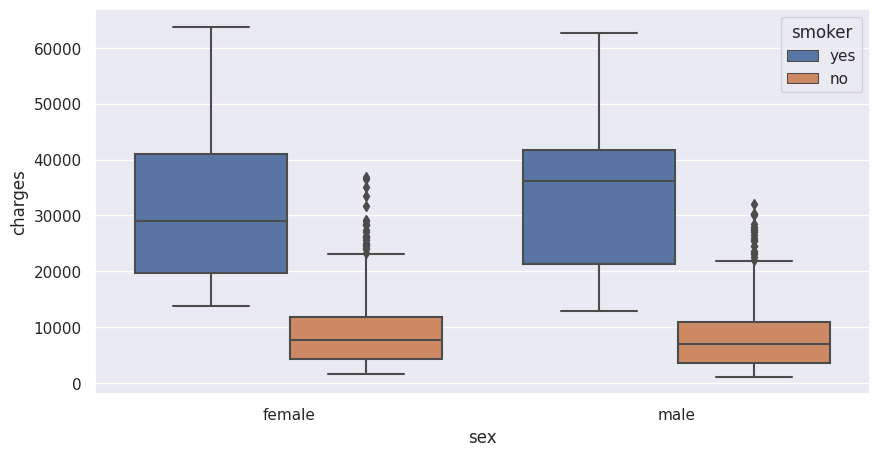

In [110]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'sex', y = 'charges', hue = 'smoker', data = medical)
plt.show()

You can see that smokers are being charged more irrespective of their gender

Now lets see how different the smokers are charged in different regions

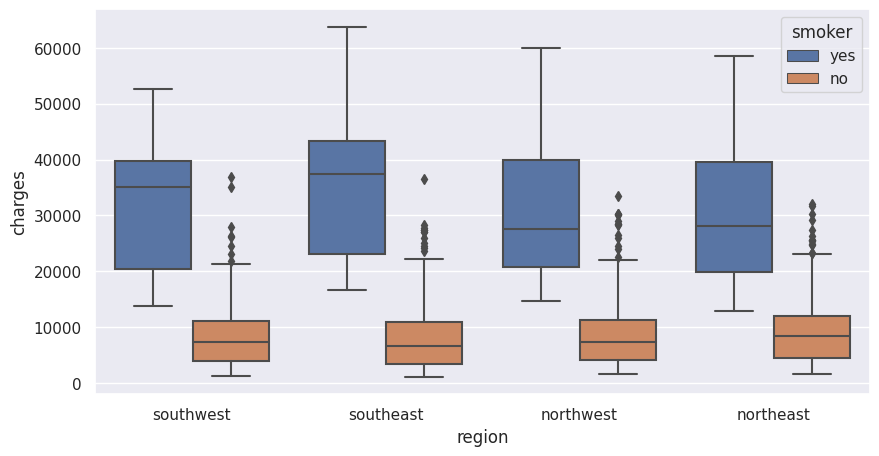

In [111]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'region', y = 'charges', hue = 'smoker', data = medical)
plt.show()

You can see that smokers in South East region are bring charged more than other regions

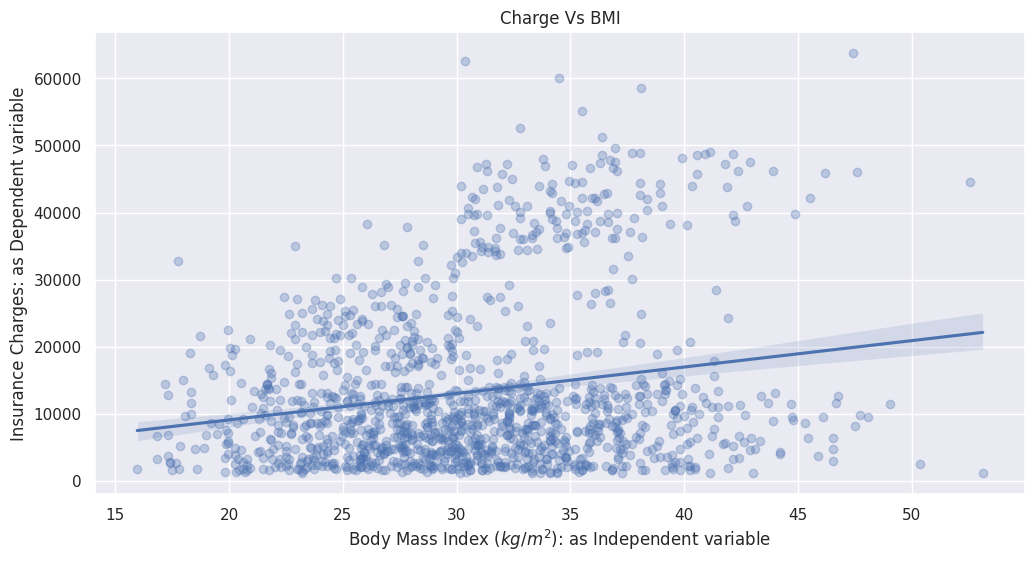

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot(x='bmi', y='charges', data=medical, ax=ax, color='b', scatter_kws={'alpha':0.3})
ax.set(xlabel='Body Mass Index $(kg/m^2)$: as Independent variable', ylabel='Insurance Charges: as Dependent variable', title='Charge Vs BMI')
plt.show()

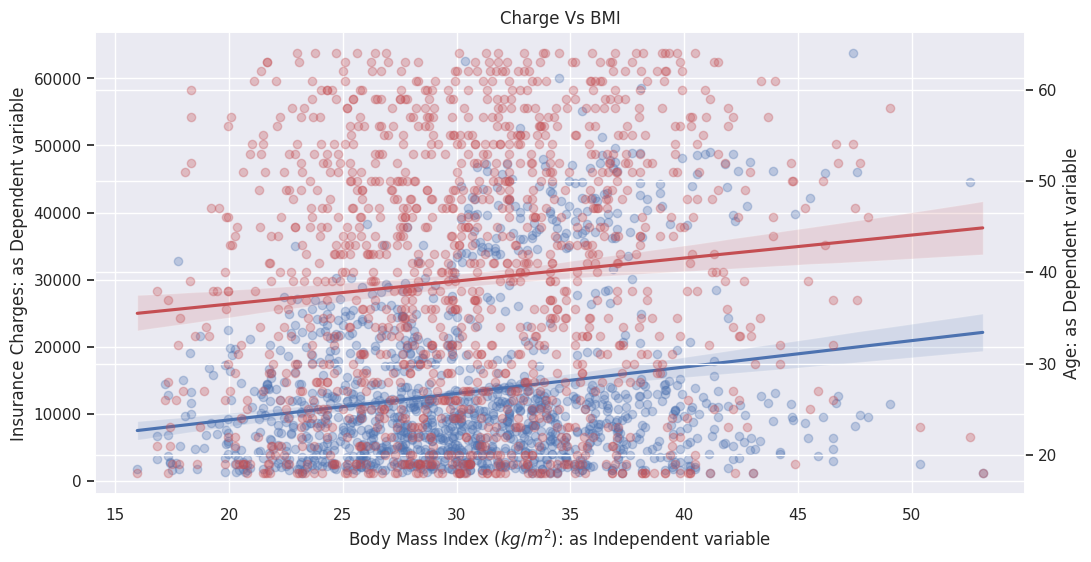

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(12, 6))
ax2 = ax.twinx()

sns.regplot(x='bmi', y='charges', data=medical, ax=ax, color='b', scatter_kws={'alpha':0.3})
sns.regplot(x='bmi', y='age', data=medical, ax=ax2, color='r', scatter_kws={'alpha':0.3})

ax.set(xlabel='Body Mass Index $(kg/m^2)$: as Independent variable', ylabel='Insurance Charges: as Dependent variable', title='Charge Vs BMI')
ax2.set(ylabel='Age: as Dependent variable')

plt.show()

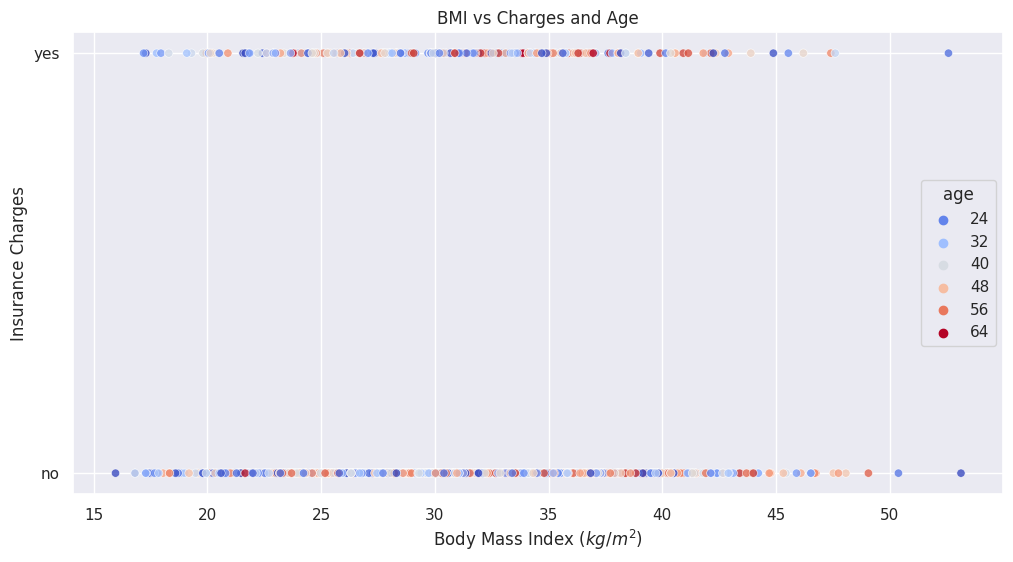

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(12, 6))

sns.scatterplot(x='bmi', y='smoker', hue='age', data=medical, ax=ax, alpha=0.8, palette='coolwarm')

ax.set(xlabel='Body Mass Index $(kg/m^2)$', ylabel='Insurance Charges', title='BMI vs Charges and Age')

plt.show()

You can see people with high age and high BMI are usually the people at high risk so they're being charged more

Now , Lets see how see how BMI varies for smoker and non-smoke for their respective age groups

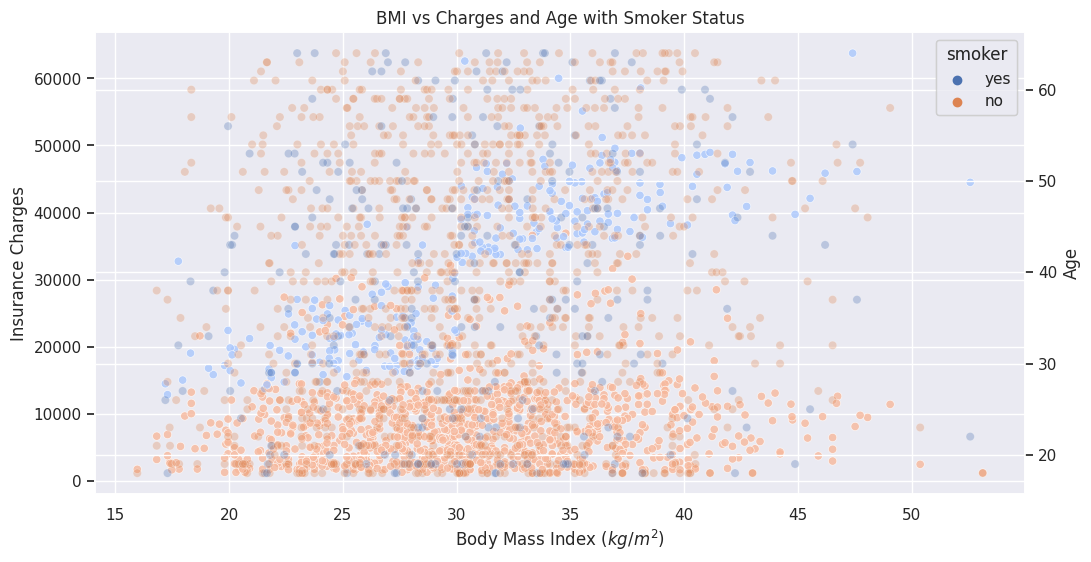

In [115]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(figsize=(12, 6))

ax2 = ax.twinx()

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=medical, ax=ax, alpha=0.8, palette='coolwarm')
sns.scatterplot(x='bmi', y='age',hue='smoker', color='black', data=medical, ax=ax2, alpha=0.3)

ax.set(xlabel='Body Mass Index $(kg/m^2)$', ylabel='Insurance Charges', title='BMI vs Charges and Age with Smoker Status')
ax2.set(ylabel='Age')

plt.show()



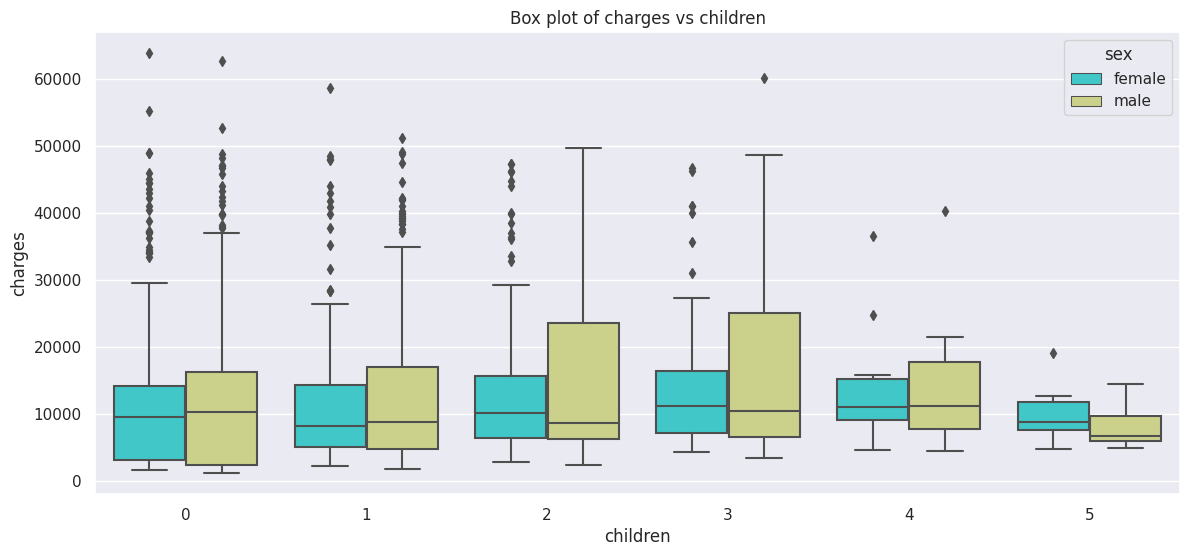

In [116]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=medical,palette='rainbow')
plt.title('Box plot of charges vs children');

In [117]:
medical.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

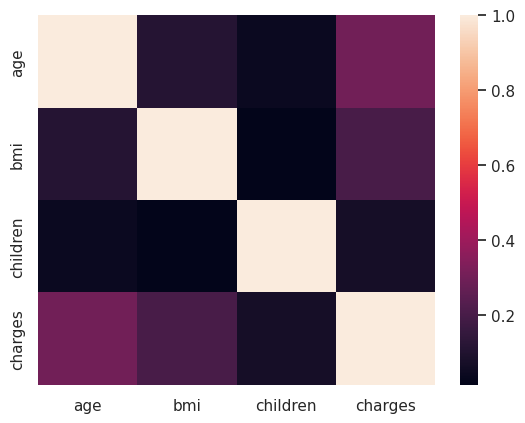

In [118]:
corr_=medical.corr()
sns.heatmap(corr_)

Thre is no correlation among valiables.

Let's now perform Label Encoding

In [119]:
medical.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


We need to encode sex, region and smoker

In [120]:
col = ["sex","smoker","region"]

data=pd.get_dummies(medical,columns=col)
data


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [121]:
# Drop multiple columns
cols_to_drop = ['sex_female', 'smoker_no', 'region_northeast']
data = data.drop(cols_to_drop, axis=1)

In [122]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<Axes: >

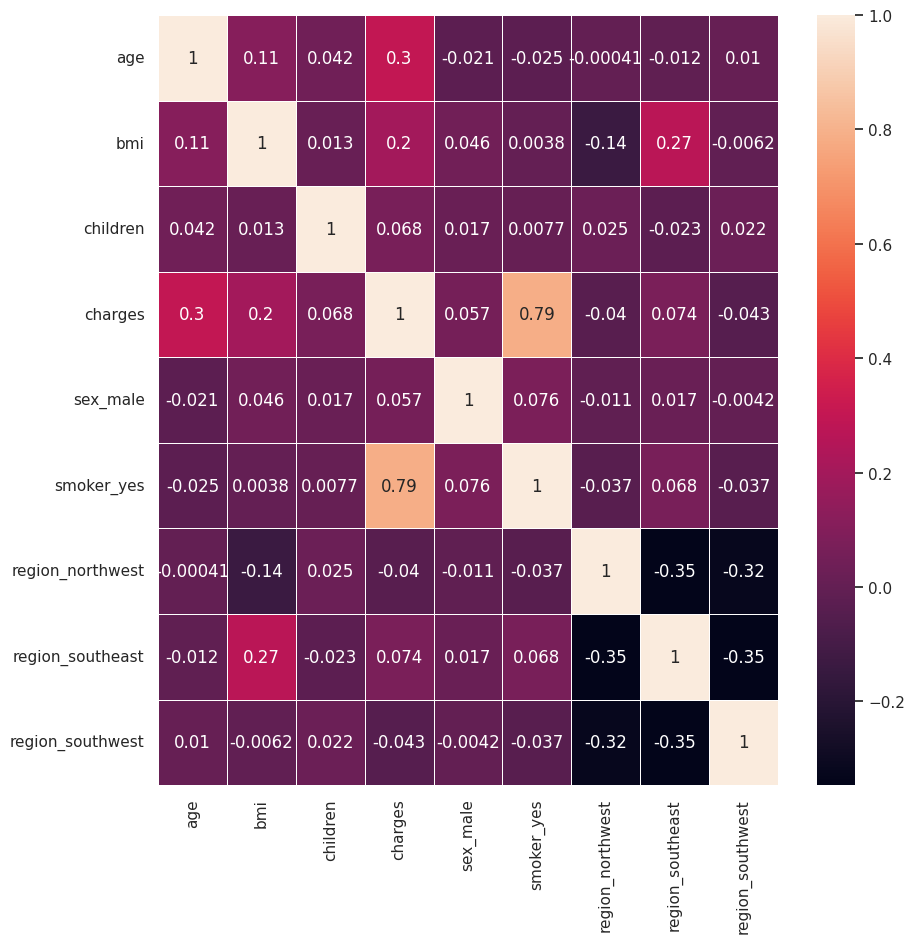

In [123]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),linewidths=0.5,annot=True)



We see that smoker_yes is highly correlated with charges. Also, age and bmi have positive correlation with charges.


# Let's check Linear Assumption

To check the assumptions of linear regression in Python, you can use the statsmodels library. Here's an overview of how to check each assumption:

1. Linearity: Plot a scatter plot of the dependent variable against each independent variable. If the relationship is not linear, you may need to consider transformations or non-linear models.

<Axes: xlabel='age', ylabel='charges'>

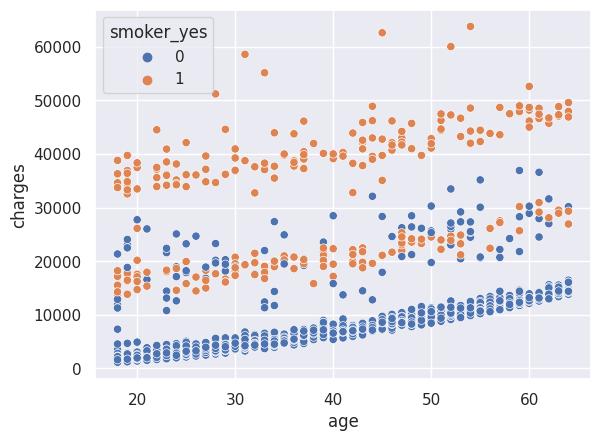

In [124]:
#this looks like linear relation
sns.scatterplot(x='age', y='charges', hue='smoker_yes', data=data)

<Axes: xlabel='age', ylabel='charges'>

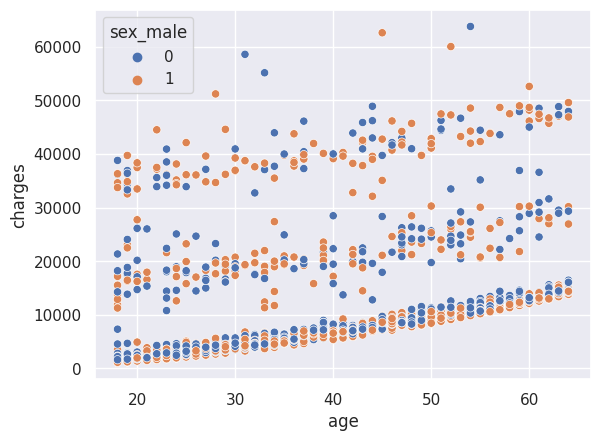

In [125]:
sns.scatterplot(x='age', y='charges', hue='sex_male', data=data)

<Axes: xlabel='age', ylabel='charges'>

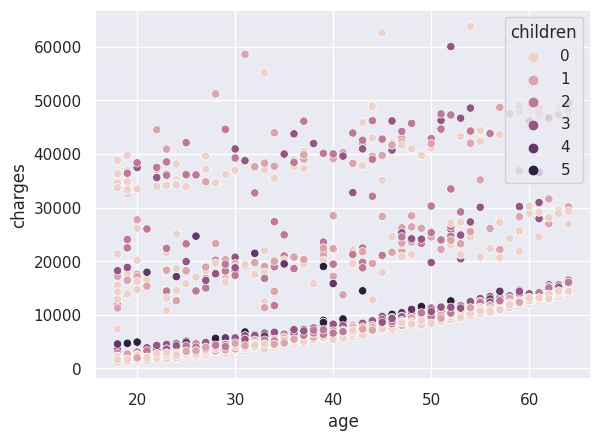

In [126]:
sns.scatterplot(x='age', y='charges', hue='children', data=data)

So, our first assumption of Linear regression is valid so we dont transform out data further to make it linear

In [127]:
data.head(2)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0


age: Shapiro-Wilk test: statistic=0.9447, p-value=0.0000


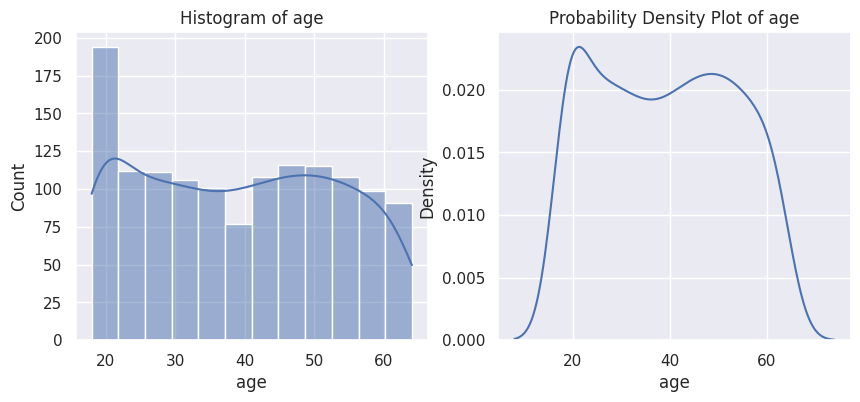

bmi: Shapiro-Wilk test: statistic=0.9939, p-value=0.0000


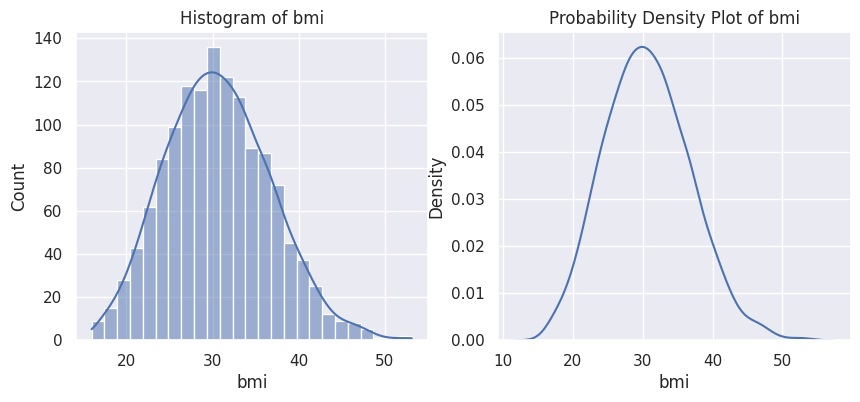

children: Shapiro-Wilk test: statistic=0.8232, p-value=0.0000


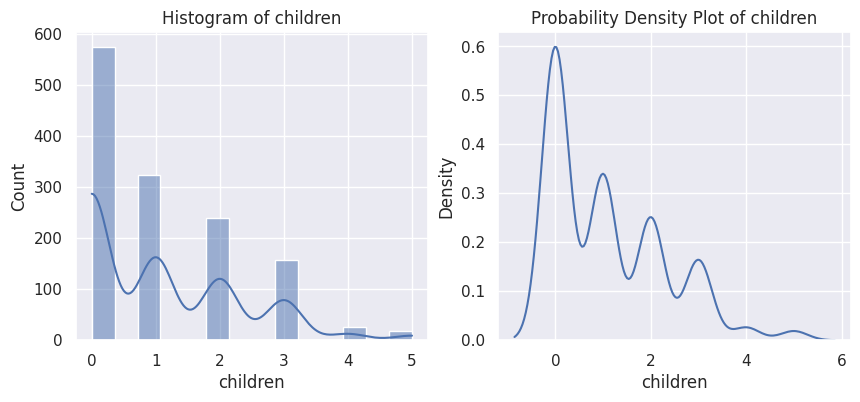

charges: Shapiro-Wilk test: statistic=0.8147, p-value=0.0000


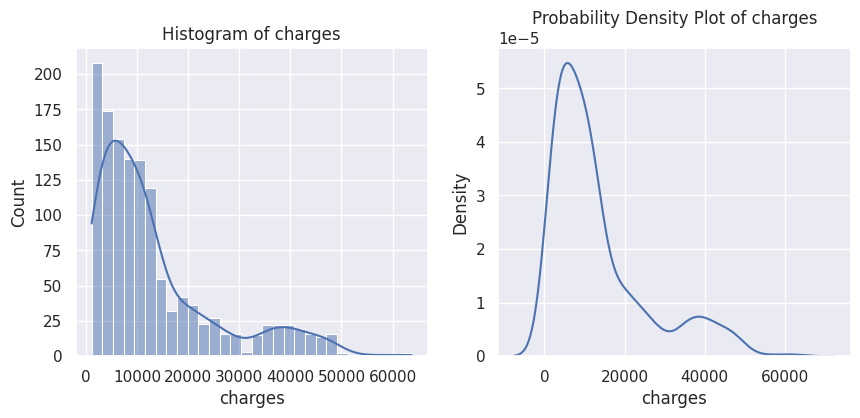

sex_male: Shapiro-Wilk test: statistic=0.6366, p-value=0.0000


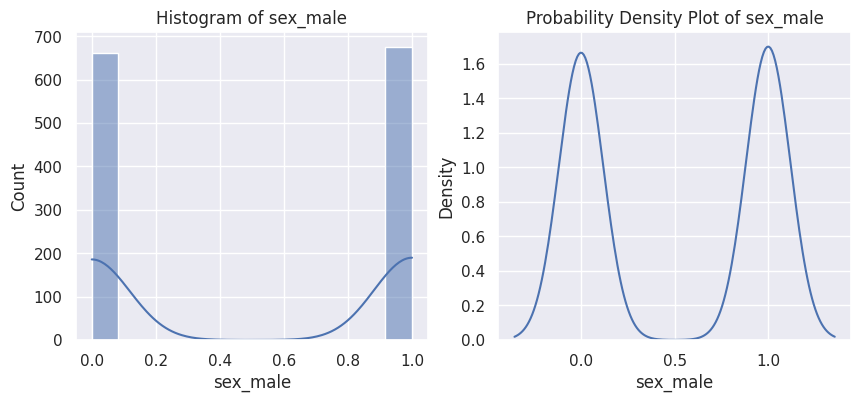

smoker_yes: Shapiro-Wilk test: statistic=0.4950, p-value=0.0000


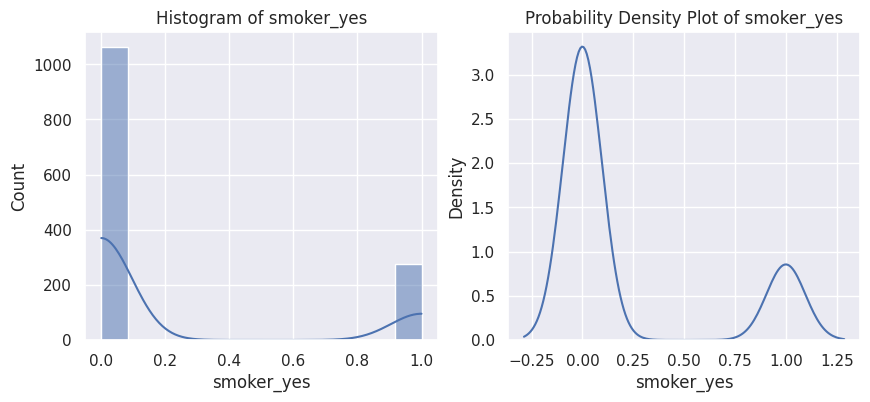

region_northwest: Shapiro-Wilk test: statistic=0.5324, p-value=0.0000


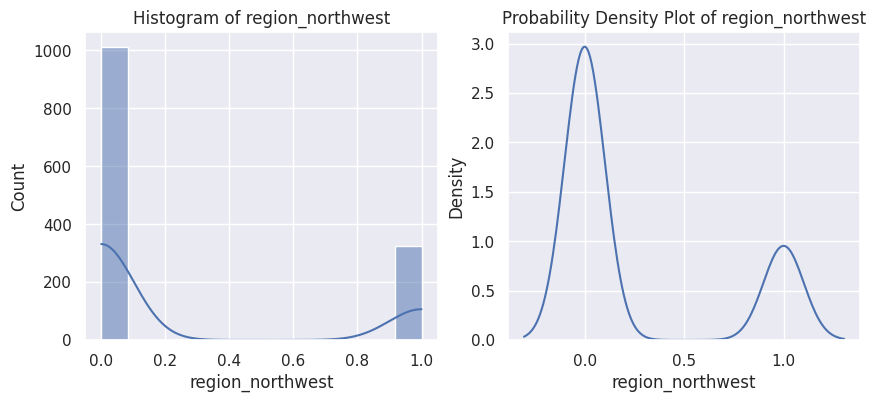

region_southeast: Shapiro-Wilk test: statistic=0.5562, p-value=0.0000


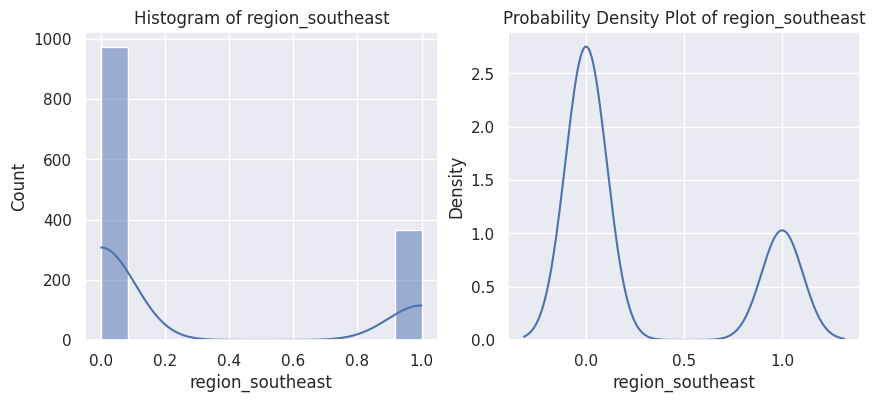

region_southwest: Shapiro-Wilk test: statistic=0.5324, p-value=0.0000


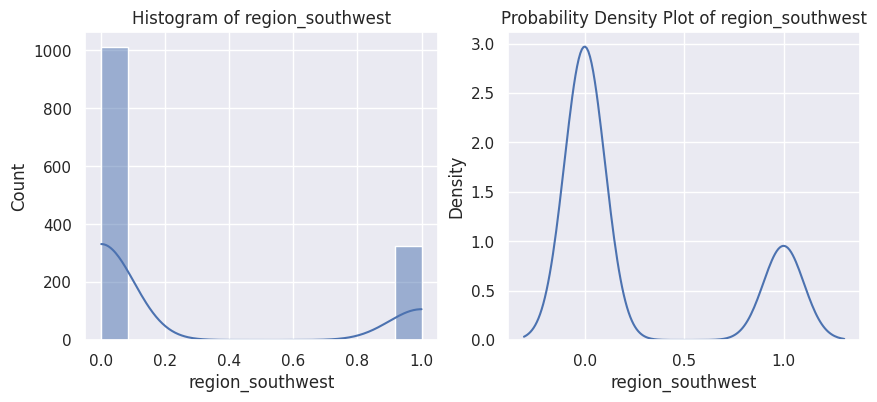

In [128]:
from scipy import stats
for column in data.columns:
    # Perform Shapiro-Wilk test on the column
    stat, p = stats.shapiro(data[column])
    print(f"{column}: Shapiro-Wilk test: statistic={stat:.4f}, p-value={p:.4f}")
    
    # Plot a histogram and a probability density plot of the column
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(data[column], kde=True, ax=ax[0])
    sns.kdeplot(data[column], ax=ax[1])
    ax[0].set_title(f"Histogram of {column}")
    ax[1].set_title(f"Probability Density Plot of {column}")
    plt.show()

From above plot you can see that charges are not normally distributed so we perform log transformation on Charges i.e. Dependent variabl 

In [129]:
data['charges'] = np.log(data['charges'])

In [130]:
data.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734176,0,1,0,0,1
1,18,33.770,1,7.453302,1,0,0,1,0
2,28,33.000,3,8.400538,1,0,0,1,0
3,33,22.705,0,9.998092,1,0,1,0,0
4,32,28.880,0,8.260197,1,0,1,0,0


<Axes: xlabel='charges', ylabel='Density'>

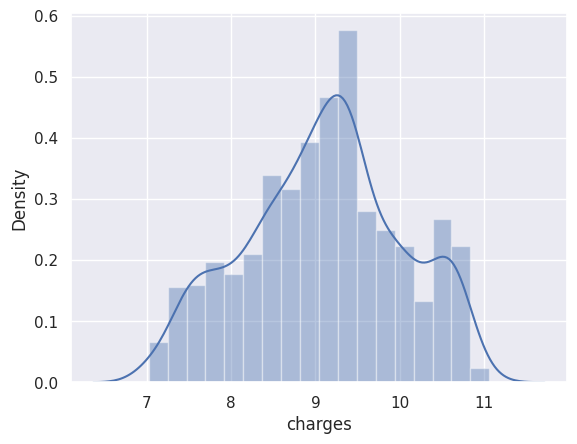

In [131]:
sns.distplot(data['charges'])

In [132]:
from scipy.stats import normaltest
# Test if the 'charges' variable is normally distributed
stat, p = normaltest(data['charges'])

# Print the test statistics and p-value
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret the test results
alpha = 0.05
if p > alpha:
    print('The sample looks normal (fail to reject H0)')
else:
    print('The sample does not look normal (reject H0)')

Statistics=52.717, p=0.000
The sample does not look normal (reject H0)


For now treat it as normally distributed

# Splitting the Data into Training and Testing Sets

---


As you know, the first basic step for regression is performing a train-test split.

In [133]:
from sklearn.model_selection import train_test_split
X = data.drop('charges',axis=1) # Independet variable
y = data['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

If you are planning to perform feature scaling on your data, it is important to perform the scaling on the training set and then use the same scaling parameters to transform the test set.

This is because you want to simulate how your model will perform on new, unseen data. If you use the full dataset to estimate the scaling parameters, you may be introducing some information from the test set into the training set, which can lead to overfitting and poor generalization performance.

Therefore, you should fit the scaler object (e.g. StandardScaler) on the training data only, and then use this scaler object to transform both the training and test data. 

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [134]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
923,34,35.815,0,1,0,1,0,0
1121,46,38.170,2,1,0,0,1,0
713,20,40.470,0,1,0,0,0,0
552,62,21.400,0,1,0,0,0,1
738,23,31.730,3,1,1,0,0,0
...,...,...,...,...,...,...,...,...
31,18,26.315,0,0,0,0,0,0
950,57,18.335,0,1,0,0,0,0
1064,29,25.600,4,0,0,0,0,1
742,53,34.105,0,1,1,0,0,0


In [136]:
from sklearn.preprocessing import StandardScaler
scaler=MinMaxScaler() # Specified range, usually between 0 and 1.

num_vars = ['age', 'bmi', 'children']

In [137]:
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [138]:
y_train

923      8.371106
1121     9.029677
713      7.593099
552      9.469401
738     10.496513
          ...    
31       7.695390
950      9.353130
1064     8.649776
742     10.674855
595      9.085229
Name: charges, Length: 936, dtype: float64

In [139]:
# we transformed the X_test as well
X_test[num_vars] = scaler.transform(X_test[num_vars])

# Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

# LM model 1

In [140]:
X_train.head(3)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
923,-0.407672,0.775027,-0.878725,1,0,1,0,0
1121,0.438875,1.151759,0.766248,1,0,0,1,0
713,-1.395310,1.519691,-0.878725,1,0,0,0,0


In [141]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['bmi']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [142]:
# Check the parameters obtained

lr.params

const    9.129006
bmi      0.131706
dtype: float64

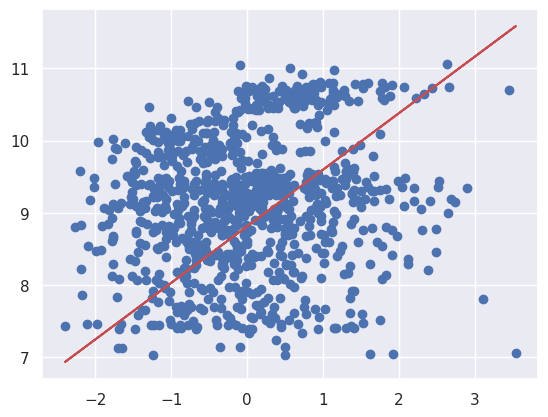

In [143]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 8.812754 + 0.783139*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [144]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     19.70
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.01e-05
Time:                        07:04:08   Log-Likelihood:                -1236.6
No. Observations:                 936   AIC:                             2477.
Df Residuals:                     934   BIC:                             2487.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1290      0.030    307.643      0.0

### Adding another variable

The R-squared value obtained is `0.021`

In [145]:
# Assign all the feature variables to X
X_train_lm = X_train[['children', 'bmi']]

In [146]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const       9.129006
children    0.134319
bmi         0.128850
dtype: float64

In [147]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     20.52
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.90e-09
Time:                        07:04:13   Log-Likelihood:                -1226.3
No. Observations:                 936   AIC:                             2459.
Df Residuals:                     933   BIC:                             2473.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1290      0.029    310.906      0.0

In [148]:
X_train.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [149]:
# Assign all the feature variables to X
X_train_lm = X_train[['children','region_southwest','sex_male','smoker_yes',"smoker_yes","region_southeast",'age','region_northwest']]


In [150]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const               8.903361
children            0.125169
region_southwest   -0.117649
sex_male           -0.066402
smoker_yes          0.773205
smoker_yes          0.773205
region_southeast   -0.088667
age                 0.478208
region_northwest   -0.059425
dtype: float64

In [151]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     407.3
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          7.26e-278
Time:                        07:04:26   Log-Likelihood:                -589.20
No. Observations:                 936   AIC:                             1194.
Df Residuals:                     928   BIC:                             1233.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                8.9034      0.034  

In [152]:

X_train_lm = X_train[['smoker_yes', 'age', 'children']]
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     936.2
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          1.19e-280
Time:                        07:04:31   Log-Likelihood:                -596.02
No. Observations:                 936   AIC:                             1200.
Df Residuals:                     932   BIC:                             1219.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8046      0.017    522.107      0.0

# Let's now use VIF

In [98]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [99]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,4.90
0,age,2.97
6,region_southeast,2.10
3,sex_male,1.93
2,children,1.71
7,region_southwest,1.71
5,region_northwest,1.65
4,smoker_yes,1.26


We generally want a VIF that is less than 5. So there are clearly no variables we need to drop.

In [86]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     489.7
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          1.25e-283
Time:                        06:52:12   Log-Likelihood:                -578.96
No. Observations:                 936   AIC:                             1172.
Df Residuals:                     929   BIC:                             1206.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.8376      0.047  

# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [87]:
y_train_charges = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

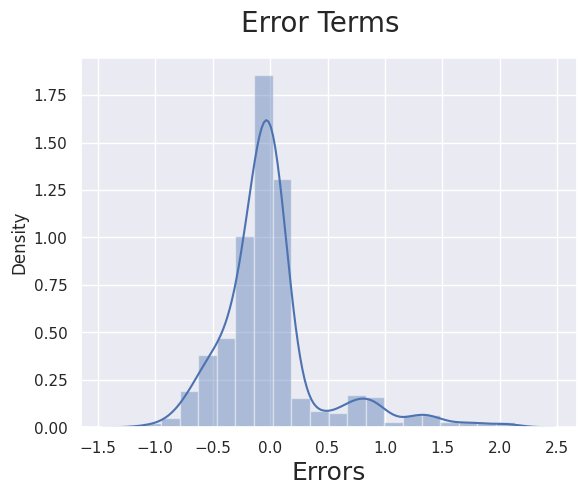

In [88]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_charges), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [154]:
X_test

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
918,1.497059,-0.443150,-0.878725,0,0,0,0,1
755,-0.619309,-0.531933,0.766248,1,0,0,0,0
207,-0.337126,-0.516736,0.766248,1,1,0,0,0
520,0.721057,-0.577525,-0.878725,0,0,0,0,0
695,-0.972037,1.474100,-0.878725,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1302,-1.042582,-1.626933,-0.056238,0,0,0,0,1
1191,0.086147,-1.474161,-0.056238,0,0,0,0,0
1085,-0.054944,-2.026860,3.233708,0,1,0,0,1
663,-1.536401,0.430291,-0.878725,1,0,0,1,0


In [155]:

X_test_lm = X_test[['smoker_yes', 'age', 'children']]
# Build a linear model

import statsmodels.api as sm
X_test_lm = sm.add_constant(X_test_lm)

lr = sm.OLS(y_test, X_test_lm).fit()

lr.params

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     455.1
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          3.22e-128
Time:                        07:07:31   Log-Likelihood:                -238.49
No. Observations:                 402   AIC:                             485.0
Df Residuals:                     398   BIC:                             501.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7956      0.025    357.903      0.0

In [156]:
# Making predictions using the fourth model

y_pred = lr.predict(X_test_lm)

Text(0, 0.5, 'y_pred')

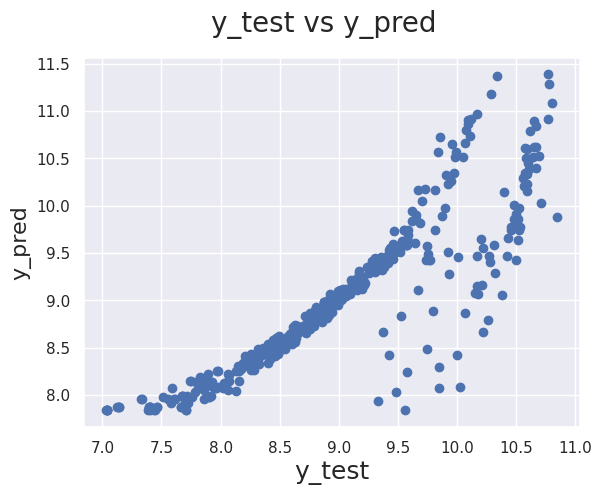

In [157]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0.5, 0, 'Errors')

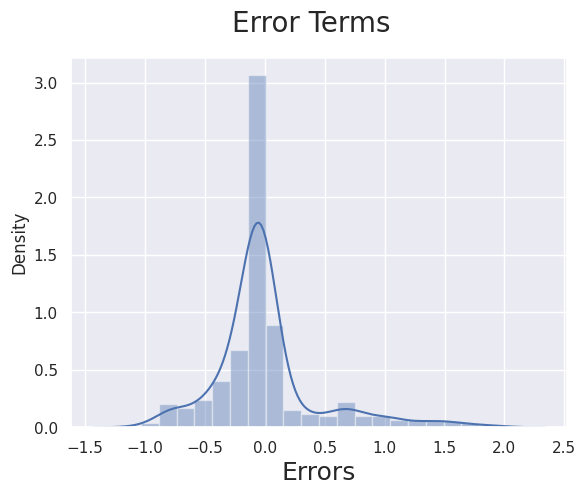

In [160]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)       
